In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:
# get an image
img = cv2.imread("../img/480x360/8BIT/COLOR/img_480x360_3x8bit_RGB_color_bars_CMYKWRGB_100IRE.png")
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'RGB')

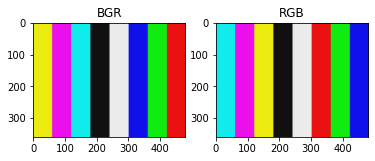

In [4]:
# Display original and change to RGB
plt.subplot(121)
plt.imshow(img)
plt.title("BGR")
plt.subplot(122)
plt.imshow(img_RGB)
plt.title("RGB")


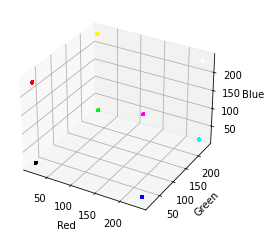

In [5]:
# RGB Color Space Visualization of Original image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# Set up Plot and Split R, G, B
r, g, b = cv2.split(img_RGB)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# Normalizing as Numpy array
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Scatter and Show
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

## Resource: https://realpython.com/python-opencv-color-spaces/
## We can see the value of R, G, B of each color with this visualization

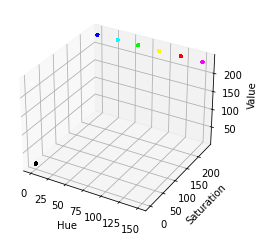

In [7]:
## Converting to HSV
hsv_img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

# Splitting H, S, V
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# Scatter and Show
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

## Resource: https://realpython.com/python-opencv-color-spaces/
## We can see the value of R, G, B of each color with this visualization

In [8]:
### Defining boundaries to mask original image
## Red
l_r = np.array([0,1,0])
u_r = np.array([0,255,255])
## Blue
l_b = np.array([91,0,0])
u_b = np.array([149,255,255])
## Green
l_g = np.array([31,0,0])
u_g = np.array([89,255,255])

## Mask image
mask_red = cv2.inRange(hsv_img,l_r,u_r)
mask_blue = cv2.inRange(hsv_img,l_b,u_b)
mask_green = cv2.inRange(hsv_img,l_g,u_g)

# Do bitwise AND operation to image
result_red = cv2.bitwise_and(img_RGB,img_RGB,mask=mask_red)
result_blue = cv2.bitwise_and(img_RGB,img_RGB,mask=mask_blue)
result_green = cv2.bitwise_and(img_RGB,img_RGB,mask=mask_green)


Text(0.5, 1.0, 'Green')

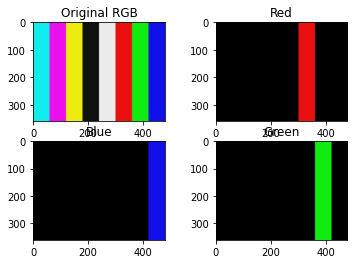

In [9]:
## Show mask and result
plt.subplot(2, 2, 1)
plt.imshow(img_RGB)
plt.title('Original RGB')
plt.subplot(2, 2, 2)
plt.imshow(result_red)
plt.title('Red')
plt.subplot(2, 2, 3)
plt.imshow(result_blue)
plt.title('Blue')
plt.subplot(2, 2, 4)
plt.imshow(result_green)
plt.title('Green')